<a href="https://colab.research.google.com/github/juancbotero/aplicaciones_finanzas/blob/main/Optimal_Portfolio_Colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **En primer lugar importamos las librerías que vamos a necesitar.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from matplotlib.figure import Figure
import plotly.graph_objects as go
from scipy.optimize import minimize
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **En el segundo paso importamos desde Excel la data de los activos que seleccionemos.**

In [ ]:
# Next we will get the stock tickers and the price data.

# file_path = 'C:\Users\Juan Carlos\Dropbox\Clases\EAFIT\Inversiones\Archivos Excel\Construccion.xlsx'

file_path = '/content/drive/My Drive/Colab/Excel Files for Colab/Construcción Optimización Portafolios.xlsx'

returns_data = pd.read_excel(file_path, sheet_name='IMI Historical Data (1)')

returns_data.set_index('Date', inplace=True)

column_names = returns_data.columns.tolist()

# Print the column names
print(column_names)

tick = column_names

print(returns_data.head())


['Cemento Argos', 'Bancolombia', 'Ecopetrol', 'Grupo Energía de Bogotá (GEB)', 'ISA']
            Cemento Argos  Bancolombia  Ecopetrol  \
Date                                                
2010-04-04         0.0184       0.0368     0.0093   
2010-04-11         0.0000       0.0095    -0.0128   
2010-04-18         0.0082      -0.0009     0.0335   
2010-04-25        -0.0634      -0.0120    -0.0054   
2010-05-02        -0.0486       0.0113    -0.0344   

            Grupo Energía de Bogotá (GEB)     ISA  
Date                                               
2010-04-04                         0.0040  0.0094  
2010-04-11                        -0.0054  0.0015  
2010-04-18                         0.0375  0.0139  
2010-04-25                        -0.0039 -0.0107  
2010-05-02                        -0.0395 -0.0370  


## **En el tercer paso calculamos el retorno promedio de los activos, así como su desviación estándar.**

In [ ]:
Assets_Returns = (np.mean(returns_data)*52)
print('Annual Asset Returns')
print(Assets_Returns)

print()

Assets_Std = (np.std(returns_data)*np.sqrt(52))
print('Annual Standard Deviations')
print(Assets_Std)

print()



Annual Asset Returns
Cemento Argos                    0.012941
Bancolombia                      0.099214
Ecopetrol                        0.053118
Grupo Energía de Bogotá (GEB)    0.045181
ISA                              0.072432
dtype: float64

Annual Standard Deviations
Cemento Argos                    0.338958
Bancolombia                      0.309716
Ecopetrol                        0.346727
Grupo Energía de Bogotá (GEB)    0.205431
ISA                              0.260329
dtype: float64



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## **En este cuarto paso calculamos el Ratio de Sharpe de cada uno de los activos con los que estamos trabajando, así como el del S&P500.**

In [ ]:
risk_free_asset = 0.04

Sharpe_Ratios_Assets = (Assets_Returns - risk_free_asset) / Assets_Std

print('Sharpe Ratios')
print(Sharpe_Ratios_Assets)

Sharpe Ratios
Cemento Argos                   -0.079829
Bancolombia                      0.191190
Ecopetrol                        0.037834
Grupo Energía de Bogotá (GEB)    0.025222
ISA                              0.124582
dtype: float64


## **En el quinto paso convertimos los precios de los activos a Base 100, con el fin de poderlos apreciar mejor en una gráfica.**

In [ ]:
# create price series
# Create a DataFrame with prices starting at 100 for each asset
Prices_Base100 = (1 + returns_data).cumprod() * 100
print(Prices_Base100.head())

            Cemento Argos  Bancolombia   Ecopetrol  \
Date                                                 
2010-04-04     101.840000   103.680000  100.930000   
2010-04-11     101.840000   104.664960   99.638096   
2010-04-18     102.675088   104.570762  102.975972   
2010-04-25      96.165487   103.315912  102.419902   
2010-05-02      91.491845   104.483382   98.896657   

            Grupo Energía de Bogotá (GEB)         ISA  
Date                                                   
2010-04-04                     100.400000  100.940000  
2010-04-11                      99.857840  101.091410  
2010-04-18                     103.602509  102.496581  
2010-04-25                     103.198459  101.399867  
2010-05-02                      99.122120   97.648072  


## **En esta parte vamos a graficar los precios de los activos en base 100.**

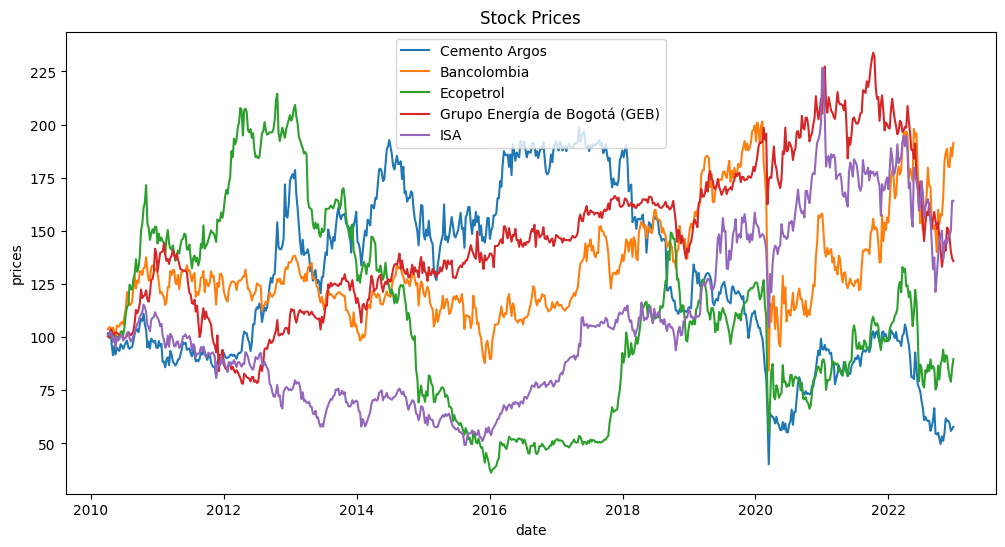

In [ ]:
# Increase the size of the graph
plt.figure(figsize=(12, 6))

# plotting the points
plt.plot(Prices_Base100, label=(tick))

# naming the x axis
plt.xlabel('date')
# naming the y axis
plt.ylabel('prices')

# giving a title to my graph
plt.title('Stock Prices')

# Adding legends based on column names in the DataFrame
plt.legend()


# function to show the plot
plt.show()

## **Ahora Calcularemos tanto la Matriz de Correlaciones como la Matriz de Varianza-Covarianza**

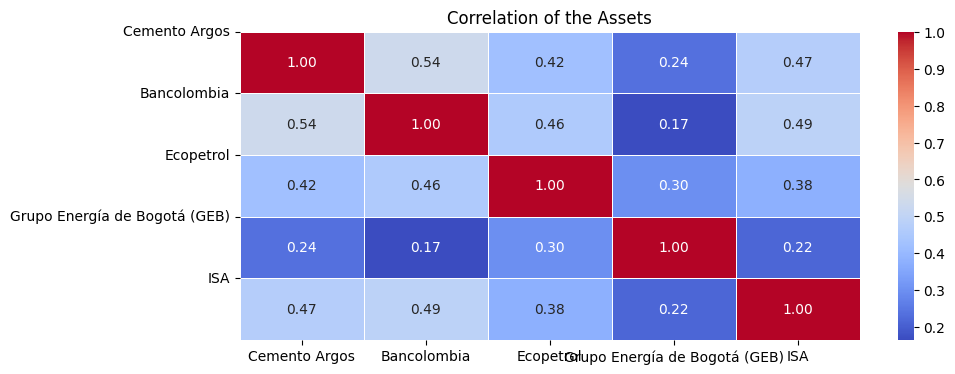


Matrix Variance-Covariance (Annual)
                               Cemento Argos  Bancolombia  Ecopetrol  \
Cemento Argos                       0.115066     0.056466   0.049803   
Bancolombia                         0.056466     0.096068   0.049036   
Ecopetrol                           0.049803     0.049036   0.120401   
Grupo Energía de Bogotá (GEB)       0.016441     0.010571   0.021216   
ISA                                 0.041601     0.039670   0.034060   

                               Grupo Energía de Bogotá (GEB)       ISA  
Cemento Argos                                       0.016441  0.041601  
Bancolombia                                         0.010571  0.039670  
Ecopetrol                                           0.021216  0.034060  
Grupo Energía de Bogotá (GEB)                       0.042265  0.011525  
ISA                                                 0.011525  0.067873  


In [ ]:
Mat_Correlaciones = returns_data.corr()

import seaborn as sns

plt.figure(figsize=(10, 4))
sns.heatmap(Mat_Correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.xticks(
    ticks=np.arange(0.5, len(tick), 1),
    labels=tick,
    rotation=0,
    ha='center')

plt.yticks(range(len(tick)), tick, rotation=0)

plt.title('Correlation of the Assets')
plt.show()

print()
print('Matrix Variance-Covariance (Annual)')
Mat_Var_Covar = returns_data.cov()*52
print(Mat_Var_Covar)


## **Ahora vamos a calcular el retorno y varianza de un portafolio de pesos iguales (Equally Weighted)**

In [ ]:
num_assets = len(tick)
W_equal = np.ones(num_assets) / num_assets
print(W_equal)

print()

print('Return of an Equally Weighted Portfolio')
Return_Equally_Weighted = np.dot(W_equal, Assets_Returns)
print(f"{Return_Equally_Weighted:.2%}")

print()

print('Variance of an Equally Weighted Portfolio')
Variance_Equally_Weighted = np.dot(np.dot(W_equal, Mat_Var_Covar), W_equal.T)
print(f"{Variance_Equally_Weighted:.2%}")

print()

print('Sharpe Ratio of an Equally Weighted Portfolio')
SR_Equally_Weighted = (Return_Equally_Weighted - risk_free_asset) / np.sqrt(Variance_Equally_Weighted)
print(f"{SR_Equally_Weighted:.2}")

[0.2 0.2 0.2 0.2 0.2]

Return of an Equally Weighted Portfolio
5.66%

Variance of an Equally Weighted Portfolio
4.41%

Sharpe Ratio of an Equally Weighted Portfolio
0.079


## **A continuación simulamos muchos vectores W y para cada uno, calculamos el retorno del portafolio de riesgo, su desviación estándar y el Ratio de Sharpe**

In [ ]:
# Simulating 10.000 portfolios
num_port = 10000

# Creating an empty array to store portfolio weights
all_weights = np.zeros((num_port, len(tick)))

# Creating an empty array to store portfolio returns
returns = np.zeros((num_port))

# Creating an empty array to store portfolio risks
stand_dev = np.zeros((num_port))

# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

# Lets run the for loop.
for i in range(num_port):
  weights = np.array(np.random.random(num_assets))
  weights = weights/np.sum(weights)

  # saving weights in the array
  all_weights[i,:] = weights

  # Saving Portfolio returns
  returns[i] = np.dot(weights, Assets_Returns)

  # Portfolio Risk
  stand_dev[i]= np.sqrt(np.dot(np.dot(weights, Mat_Var_Covar), weights.T))

  # Portfolio Sharpe Ratio
  sharpe_ratio[i] = (returns[i] - risk_free_asset) / stand_dev[i]


## **Seguidamente vamos a seleccionar el portafolio que tenga el máximo Ratio de Sharpe y ese será el portafolio óptimo**

                               optimal weight
Cemento Argos                        0.006300
Bancolombia                          0.543517
Ecopetrol                            0.018663
Grupo Energía de Bogotá (GEB)        0.146208
ISA                                  0.285312

Sharpe Ratio Óptimo = 0.18562936448832654

*** Sharpe Ratio Assets ***
Cemento Argos                   -0.079829
Bancolombia                      0.191190
Ecopetrol                        0.037834
Grupo Energía de Bogotá (GEB)    0.025222
ISA                              0.124582
dtype: float64


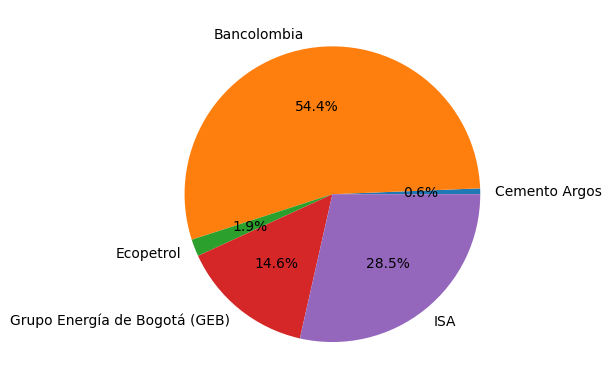

In [ ]:
sharpe_ratio.max()

sharpe_ratio.argmax()

optimal_weights = all_weights[sharpe_ratio.argmax(),:]

return_optimal_portfolio = returns[sharpe_ratio.argmax()]

std_dev_optimal_portfolio = stand_dev[sharpe_ratio.argmax()]

df = pd.DataFrame(optimal_weights, columns=['optimal weight'], index=tick)

print(df)
print()
print(f'Sharpe Ratio Óptimo = {sharpe_ratio.max()}')
print()
print('*** Sharpe Ratio Assets ***')
print(Sharpe_Ratios_Assets)

plt.pie(optimal_weights, labels=tick, autopct='%1.1f%%')

plt.show()


## **Ahora vamos a graficar todos los portafolios simulados**

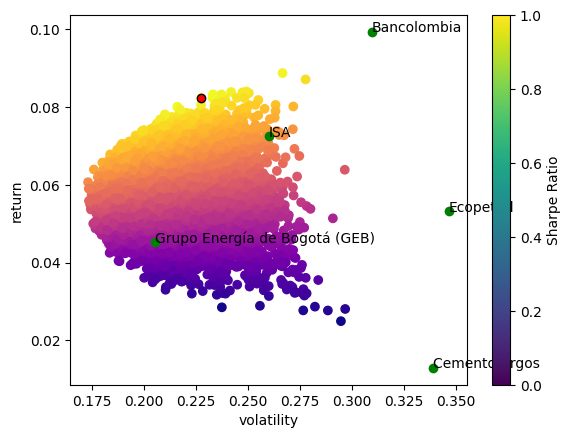

In [ ]:
plt.scatter(stand_dev, returns, c=sharpe_ratio, cmap='plasma')
plt.scatter(Assets_Std, Assets_Returns, c='green')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('volatility')
plt.ylabel('return')

labels = tick
for i, label in enumerate(labels):
    plt.text(Assets_Std[i], Assets_Returns[i], label)

plt.scatter(std_dev_optimal_portfolio, return_optimal_portfolio, c='red', edgecolors='black')